In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv3D, Conv3DTranspose, Flatten, Dense
import numpy as np

Using TensorFlow backend.


In [3]:
%load_ext autoreload
%autoreload 1
%aimport data
%reload_ext data
import data
from config import PATH
import preprocessing

In [6]:
ad = preprocessing.AneurysmData(PATH)

In [8]:
def conv_model():
    model = tf.keras.models.Sequential()
    model.add(Conv3D(filters=10,kernel_size=3,strides=(1,1,1),padding="valid", activation="relu"))
    model.add(Conv3D(filters=10,kernel_size=3,strides=(1,1,1),padding="valid", activation="relu"))
    model.add(Conv3D(filters=1,kernel_size=3,strides=(1,1,1),padding="valid", activation="relu"))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model
def conv_data():
    return np.random.uniform(size = (106,50,50,50,1)), np.random.uniform(size=(106,10))

def conv_auto_model():
    model = tf.keras.models.Sequential()
    model.add(Conv3D(filters=10,kernel_size=5,strides=(2,2,2),padding="valid", activation="relu"))
    model.add(Conv3D(filters=10,kernel_size=5,strides=(2,2,2),padding="valid", activation="relu"))
    model.add(Conv3D(filters=1,kernel_size=5,strides=(2,2,2),padding="valid", activation="relu"))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model
def conv_data():
    return np.random.uniform(size = (106,50,50,50,1)), np.random.uniform(size=(106,10))

def dense_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(5, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(5, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=[])#['accuracy'])
    return model

def dense_data():
    return np.random.uniform(size=(100,5)), np.random.uniform(size=(100,1))

In [5]:
model = dense_model()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
x = np.random.uniform(size = (10,100,100,100))

In [7]:
def conv2d_model():
    model = tf.keras.models.Sequential()
    model.add(Conv3D(filters=10,kernel_size=3,strides=(1,1,1),padding="valid", activation="relu"))
    #model.add()
    #model.add(Conv3D(filters=10,kernel_size=(3,3,3),strides=(1,1,1),padding="valid", activation="relu"))
    #model.add(Conv3D(filters=10,kernel_size=(3,3,3),strides=(1,1,1),padding="valid", activation="relu"))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model
def conv2d_data():
    return np.random.uniform(size = (100,100,100)), np.random.uniform(size=(10,100))


In [8]:
model.fit(*dense_data(),batch_size=10,epochs=10)

Epoch 1/10
100/100 [==============================] - 2s 23ms/sample - loss: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 0s 380us/sample - loss: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 0s 393us/sample - loss: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 0s 405us/sample - loss: 0.0000e+00
Epoch 5/10
100/100 [==============================] - 0s 443us/sample - loss: 0.0000e+00
Epoch 6/10
100/100 [==============================] - 0s 431us/sample - loss: 0.0000e+00
Epoch 7/10
100/100 [==============================] - 0s 430us/sample - loss: 0.0000e+00
Epoch 8/10
100/100 [==============================] - 0s 431us/sample - loss: 0.0000e+00
Epoch 9/10
100/100 [==============================] - 0s 436us/sample - loss: 0.0000e+00
Epoch 10/10
100/100 [==============================] - 0s 440us/sample - loss: 0.0000e+00


In [10]:
model = conv_model()
x = ad.correct_shape(ad.images)
y = conv_data()[1]
model.fit(x,y,batch_size=10,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
106/106 [==============================] - 1s 13ms/sample - loss: 11.8500 - acc: 0.1132
Epoch 2/10
106/106 [==============================] - 0s 689us/sample - loss: 11.6401 - acc: 0.2264
Epoch 3/10
106/106 [==============================] - 0s 742us/sample - loss: 11.5097 - acc: 0.2925
Epoch 4/10
106/106 [==============================] - 0s 754us/sample - loss: 11.3557 - acc: 0.3962
Epoch 5/10
106/106 [==============================] - 0s 717us/sample - loss: 11.2464 - acc: 0.3679
Epoch 6/10
106/106 [==============================] - 0s 746us/sample - loss: 11.1367 - acc: 0.5566
Epoch 7/10
106/106 [==============================] - 0s 740us/sample - loss: 11.0791 - acc: 0.5189
Epoch 8/10
106/106 [==============================] - 0s 736us/sample - loss: 11.0383 - acc: 0.6321
Epoch 9/10
106/106 [==============================] - 0s 745us/sample - loss: 11.0232 - acc: 0.5755
Epoch 10/10
106/106 [==============================] 

In [10]:
X_files = data.discover(data.path_images)
x = data.extract_pixel_arrays(X_files)
x = [arr.reshape(*arr.shape,1) for arr in x]

In [11]:
[x.pop(i) for i,value in enumerate(x) if value.shape !=(220, 256, 256)]

[array([[[[-470],
          [-481],
          [-506],
          ...,
          [-357],
          [-464],
          [-530]],
 
         [[-543],
          [-477],
          [-402],
          ...,
          [-393],
          [-497],
          [-524]],
 
         [[-537],
          [-555],
          [-470],
          ...,
          [-457],
          [-562],
          [-550]],
 
         ...,
 
         [[-455],
          [-428],
          [-400],
          ...,
          [-696],
          [-529],
          [-380]],
 
         [[-409],
          [-466],
          [-494],
          ...,
          [-749],
          [-631],
          [-400]],
 
         [[-448],
          [-529],
          [-513],
          ...,
          [-642],
          [-662],
          [-627]]],
 
 
        [[[-506],
          [-455],
          [-564],
          ...,
          [-389],
          [-477],
          [-559]],
 
         [[-522],
          [-487],
          [-391],
          ...,
          [-424],
          [-

In [70]:
def conv_auto_model():
    model = tf.keras.models.Sequential()
    model.add(Conv3D(filters=10,kernel_size=3,strides=1,padding="same", activation="relu"))
    model.add(Conv3D(filters=10,kernel_size=3,strides=1,padding="same", activation="relu"))
    model.add(Conv3D(filters=1,kernel_size=3,strides=1,padding="same", activation="sigmoid"))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [71]:
#ad = preprocessing.AneurysmData(PATH,size=(30,30,30))
model = conv_auto_model()
x = ad.correct_shape(ad.images)
y = ad.correct_shape(ad.masks)

model.fit(x,y,batch_size=10,epochs=100,validation_split=0.1)

Train on 95 samples, validate on 11 samples
Epoch 1/100
95/95 [==============================] - 1s 5ms/sample - loss: 5.7002e-10 - acc: 0.0364 - val_loss: 3.3515e-10 - val_acc: 0.0492
Epoch 2/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.6165e-10 - acc: 0.0364 - val_loss: 3.3515e-10 - val_acc: 0.0492
Epoch 3/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.8373e-10 - acc: 0.0364 - val_loss: 3.4238e-10 - val_acc: 0.0492
Epoch 4/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.7792e-10 - acc: 0.0364 - val_loss: 2.6290e-10 - val_acc: 0.0492
Epoch 5/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.7118e-10 - acc: 0.0364 - val_loss: 3.3876e-10 - val_acc: 0.0492
Epoch 6/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.8536e-10 - acc: 0.0364 - val_loss: 3.3154e-10 - val_acc: 0.0492
Epoch 7/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.8257e-10 - acc: 0.0364 - val_loss

95/95 [==============================] - 0s 2ms/sample - loss: 5.8768e-10 - acc: 0.0364 - val_loss: 3.3515e-10 - val_acc: 0.0492
Epoch 59/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.7839e-10 - acc: 0.0364 - val_loss: 3.2431e-10 - val_acc: 0.0492
Epoch 60/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.7699e-10 - acc: 0.0364 - val_loss: 3.3876e-10 - val_acc: 0.0492
Epoch 61/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.8327e-10 - acc: 0.0364 - val_loss: 3.2793e-10 - val_acc: 0.0492
Epoch 62/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.8675e-10 - acc: 0.0364 - val_loss: 2.6290e-10 - val_acc: 0.0492
Epoch 63/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.8048e-10 - acc: 0.0364 - val_loss: 3.3154e-10 - val_acc: 0.0492
Epoch 64/100
95/95 [==============================] - 0s 2ms/sample - loss: 5.6096e-10 - acc: 0.0364 - val_loss: 3.4599e-10 - val_acc: 0.0492
Epoch 65/100
95/95 

In [72]:
result = model.predict(x[105:]).reshape((30,30,30))

<Figure size 16000x16000 with 0 Axes>

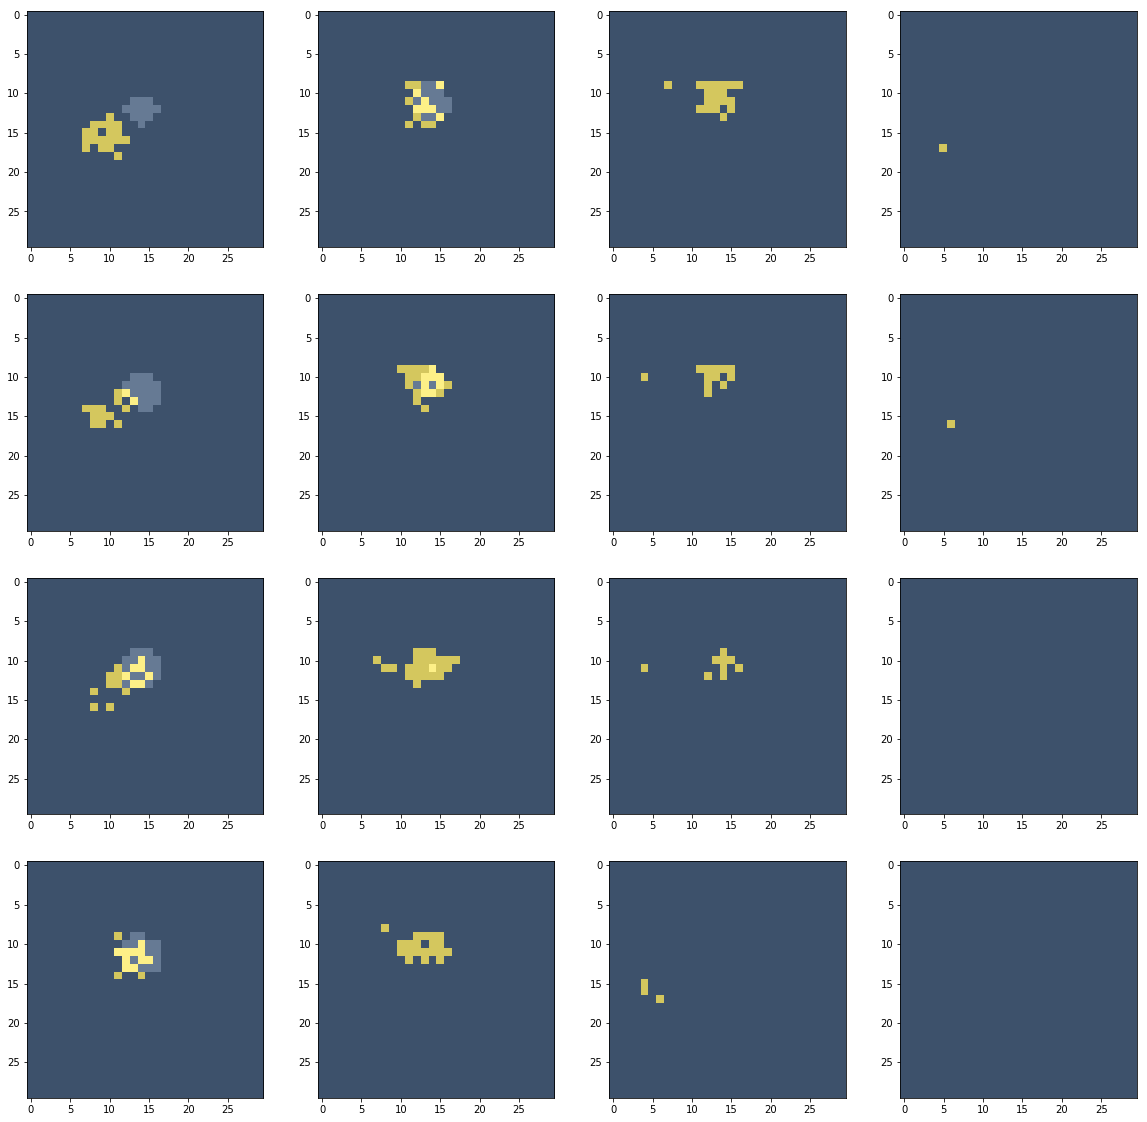

In [78]:
import matplotlib.pyplot as plt
N=4
image = ad.masks[0]
mask = result > 0.65
plt.figure(dpi=800)
plt.rcParams['figure.figsize'] = [20,20]
fig, ax = plt.subplots(nrows=N, ncols=N)
for i in range(N):
    for j in range(N):
        im = image[i+j*N+5,:,:]
        m = mask[i+j*N+5,:,:]
        ax[i,j].imshow(im,alpha=0.4,cmap="Greys_r",vmin=0,vmax=1)
        ax[i,j].imshow(m,alpha=0.6, cmap="cividis",vmin=0,vmax=1)


In [57]:
np.max(result)

0.21593949

In [59]:
np.unique(ad.masks)

array([0, 1])